# Predictive Analytics

- Movie Recommendation System
- Houses Price Prediction
- Life expectancy prediction model

# Movie Recommender System

In [18]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity

In [19]:
# 2. Load the movies and ratings data.
movies = pd.read_csv("movies.dat", sep='::', engine='python', header=None, names=['MovieID', 'Title', 'Genres'], encoding='latin-1')
ratings = pd.read_csv("ratings.dat", sep='::', engine='python', header=None, names=['UserID', 'MovieID', 'Rating', 'Timestamp'], encoding='latin-1')

In [20]:
print("\nMovies Data:")
movies.head()


Movies Data:


,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [21]:
print("\nRatings Data:")
ratings.head()


Ratings Data:


,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [25]:
merge = pd.merge(ratings,movies,on="MovieID")
Merged_matrix = pd.pivot_table(merge,values='Rating',index='Title',columns="UserID",fill_value=0)
Merged_matrix

UserID,1,2,3,4,5,6,7,8,9,10,...,6031,6032,6033,6034,6035,6036,6037,6038,6039,6040
Title,,,,,,,,,,,,,,,,,,,,,
"$1,000,000 Duck (1971)",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
'Night Mother (1986),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,3,0,0,0,0
'Til There Was You (1997),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"'burbs, The (1989)",0,0,0,0,0,0,0,0,0,4,...,0,0,0,0,0,0,0,0,0,0
...And Justice for All (1979),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Zed & Two Noughts, A (1985)",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Zero Effect (1998),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Zero Kelvin (Kjærlighetens kjøtere) (1995),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
# 5. Create m x u matrix with movies as rows and users as columns. Normalize the matrix.
# For the maximum MovieID and UserID to determine matrix shape
max_movie_id = np.max(ratings.MovieID.values)
max_user_id = np.max(ratings.UserID.values)

# Create a user-movie rating matrix with appropriate shape and data type
user_movie_matrix = np.zeros((max_movie_id, max_user_id), dtype=np.uint8)

# Matrix with ratings from the ratings DataFrame
for index, row in ratings.iterrows():
    user_movie_matrix[row['MovieID'] - 1, row['UserID'] - 1] = row['Rating']

# User-movie rating original matrix
print("Original User-Movie Rating Matrix:")
print(user_movie_matrix)

# Calculate the mean rating for each movie
mean_ratings_per_movie = np.mean(user_movie_matrix, axis=1)

# Subtract the mean ratings from each movie's ratings
normalized_matrix = user_movie_matrix - mean_ratings_per_movie.reshape(-1, 1)

# Display the normalized user-movie rating matrix
print("Normalized User-Movie Rating Matrix:")
print(normalized_matrix)

Original User-Movie Rating Matrix:
[[5 0 0 ... 0 0 3]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Normalized User-Movie Rating Matrix:
[[ 3.57400662 -1.42599338 -1.42599338 ... -1.42599338 -1.42599338
   1.57400662]
 [-0.37152318 -0.37152318 -0.37152318 ... -0.37152318 -0.37152318
  -0.37152318]
 [-0.23874172 -0.23874172 -0.23874172 ... -0.23874172 -0.23874172
  -0.23874172]
 ...
 [-0.03278146 -0.03278146 -0.03278146 ... -0.03278146 -0.03278146
  -0.03278146]
 [-0.02582781 -0.02582781 -0.02582781 ... -0.02582781 -0.02582781
  -0.02582781]
 [-0.24288079 -0.24288079 -0.24288079 ... -0.24288079 -0.24288079
  -0.24288079]]


In [27]:
# 6. Perform SVD to get U, S, and V.

U, S, V = np.linalg.svd(normalized_matrix)
U.shape, S.shape, V.shape

((3952, 3952), (3952,), (6040, 6040))

In [28]:
print(U)

[[-5.72245537e-02  2.09461200e-02 -2.86333511e-02 ...  1.79111358e-37
   1.45642305e-17  2.91964675e-17]
 [-2.69349804e-02  2.97843268e-02  8.62001932e-03 ...  1.72134482e-33
   4.00827216e-17  8.40856309e-17]
 [-1.44300959e-02  1.66998921e-02 -1.36557569e-02 ... -1.72953363e-32
  -4.61213412e-17 -3.58527744e-17]
 ...
 [-3.50288960e-03 -1.87545849e-03 -1.91670702e-03 ...  5.10551991e-32
  -4.02455846e-16  1.65882932e-16]
 [-8.19971409e-04 -2.26486119e-03 -3.47436586e-03 ...  1.01231693e-32
   5.03069808e-17 -1.40295761e-16]
 [-1.25419482e-02 -5.02192377e-03 -2.20808096e-02 ... -2.33910210e-32
   5.74627151e-17 -8.99887803e-17]]


In [29]:
print(S)

[1.29873715e+03 6.71343541e+02 5.74547984e+02 ... 1.04420671e-13
 7.95512207e-14 5.18213740e-14]


In [30]:
print(V)

[[ 7.13393053e-03  6.40383513e-04  6.72473390e-03 ...  1.13666709e-02
   3.49381899e-03 -1.32856412e-02]
 [-1.64099327e-03  2.70126226e-03  3.34737240e-03 ... -1.80896437e-03
  -1.87620989e-02 -4.08015550e-02]
 [-2.14622406e-03  2.00478360e-04  3.95617989e-03 ...  5.62198713e-04
   1.08962191e-02  3.63311909e-03]
 ...
 [-1.66579849e-03  1.06845012e-02  1.01516819e-02 ...  7.65705839e-01
  -6.32231311e-03 -5.67687516e-03]
 [ 2.35833778e-03 -3.23788664e-03 -2.18020417e-02 ... -2.33940216e-02
   3.13415578e-01  6.72302897e-03]
 [-2.75320714e-02  1.93930138e-02  2.27679372e-03 ...  2.53911292e-03
  -8.09017685e-03  7.66219658e-02]]


In [31]:
# 7. Select top 50 components from S.
top_50_components = S[:50]
print(f"selected components shape: {top_50_components.shape}")
print(top_50_components)

selected components shape: (50,)
[1298.7371535   671.34354097  574.54798415  489.11752618  431.21002875
  402.35363042  389.31365022  340.05384522  335.01098086  306.29840325
  288.16625135  272.75682845  256.36429507  252.49478741  245.41431111
  236.91770698  231.15839769  220.49401166  213.8183682   211.9943964
  206.67279848  201.0103078   199.73257464  196.76829368  192.295748
  187.19048339  184.35619532  180.887721    180.00002692  177.36515869
  172.67997645  170.21420383  167.10488723  166.45858937  164.4020894
  164.33195916  163.76540935  161.05790301  160.84634096  158.03610169
  157.37695169  156.75458807  154.42047726  154.22573073  153.16845602
  152.34775664  150.2504792   149.32202449  147.50259488  146.84737883]


In [32]:
# 8. Get the top 50 eigenvectors using eigenvalues.
cov_matrix = np.cov(normalized_matrix,rowvar=False)
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
sort_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sort_indices]
eigenvectors = eigenvectors[:,sort_indices]
components = 50
top_eigenvectors = eigenvectors[:, :components]
print(f"Top {components} Eigenvectors:")
print(top_eigenvectors)


Top 50 Eigenvectors:
[[-6.92536843e-03  1.39980377e-03  1.92793093e-03 ...  9.24756866e-03
   5.39819712e-03 -1.35752627e-02]
 [ 4.67876377e-04 -2.50494559e-03  8.93146738e-05 ... -8.15941434e-03
  -5.96595466e-03  8.83819327e-03]
 [-5.76262026e-03 -3.36146532e-03 -3.95271421e-03 ...  5.84074174e-03
  -7.24731529e-03  7.52616301e-03]
 ...
 [-1.19548256e-02  1.27400582e-03 -1.15890631e-03 ...  1.83258042e-04
  -1.19734239e-02 -5.42151312e-04]
 [-4.53309126e-03  1.85502465e-02 -1.12925419e-02 ...  2.63043746e-03
  -5.43452593e-03  1.23121299e-02]
 [ 1.32747521e-02  4.16634449e-02 -1.92013154e-03 ... -1.48062792e-02
   1.94785540e-03 -2.06836469e-02]]


In [33]:
# 9.Using cosine similarity, find 10 closest movies using the 50 components from SVD.



In [34]:
# 10. Discuss results of the above SVD methods.
# You can analyze the results, compare the recommendations, and discuss the effectiveness of the SVD-based recommendation system.

# House Prices Prediction

### Data Exploration

In [38]:
#1. importing the dataset and exploring its structure.

import pandas as pd

# Load the dataset
df = pd.read_csv('HousePrice.csv')

# Explore the dataset structure
df.info()

# Display the first few rows of the dataset to understand its structure
print(df.head())

#displaying the shape of the dataset
df.shape


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   bedrooms       4600 non-null   int64  
 2   bathrooms      4600 non-null   float64
 3   sqft_living    4600 non-null   int64  
 4   sqft_lot       4600 non-null   int64  
 5   floors         4600 non-null   float64
 6   waterfront     4600 non-null   int64  
 7   view           4600 non-null   int64  
 8   condition      4600 non-null   int64  
 9   sqft_above     4600 non-null   int64  
 10  sqft_basement  4600 non-null   int64  
 11  yr_built       4600 non-null   int64  
 12  yr_renovated   4600 non-null   int64  
 13  SalesPrice     4600 non-null   float64
dtypes: float64(3), int64(10), object(1)
memory usage: 503.3+ KB
          date  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0  5/2/14 0:00         3       1.50         1340      

(4600, 14)

#  2. Identifying Features and the Target Variable

Features: These are the independent variables in your dataset. They are the columns that you'll use to predict the target variable.
Target Variable: This is the dependent variable you want to predict. It's usually the main variable of interest in your analysis.


#### Features

- 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated'

#### Target variable

- SalesPrice

In [43]:
#3.How many samples are in the dataset? Are there any missing values?

# Count the number of samples
num_samples = df.shape[0]

# Check for missing values
missing_values = df.isnull().sum()

print(f"Number of samples: {num_samples}")
print("Missing values in each column:\n", missing_values)

Number of samples: 4600
Missing values in each column:
 date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
SalesPrice       0
dtype: int64


#### Analysis on the dataset dimensions
Out of all the 13 total features

The dataset comprises 4600 houses, 13 features and 1 Target column.

The Sales price is the base feature for all the depections.

In [44]:
#4. Summarizing the Dataset
summary_stats = df.describe()

# Display the summary statistics
print("Summary Statistics:")
summary_stats.T

Summary Statistics:


,count,mean,std,min,25%,50%,75%,max
bedrooms,4600.0,3.400870,0.908848,0.0,3.00,3.00000,4.00,9.0
bathrooms,4600.0,2.160815,0.783781,0.0,1.75,2.25000,2.50,8.0
sqft_living,4600.0,2139.346957,963.206916,370.0,1460.00,1980.00000,2620.00,13540.0
sqft_lot,4600.0,14852.516087,35884.436145,638.0,5000.75,7683.00000,11001.25,1074218.0
floors,4600.0,1.512065,0.538288,1.0,1.00,1.50000,2.00,3.5
waterfront,4600.0,0.007174,0.084404,0.0,0.00,0.00000,0.00,1.0
view,4600.0,0.240652,0.778405,0.0,0.00,0.00000,0.00,4.0
condition,4600.0,3.451739,0.677230,1.0,3.00,3.00000,4.00,5.0
sqft_above,4600.0,1827.265435,862.168977,370.0,1190.00,1590.00000,2300.00,9410.0
sqft_basement,4600.0,312.081522,464.137228,0.0,0.00,0.00000,610.00,4820.0


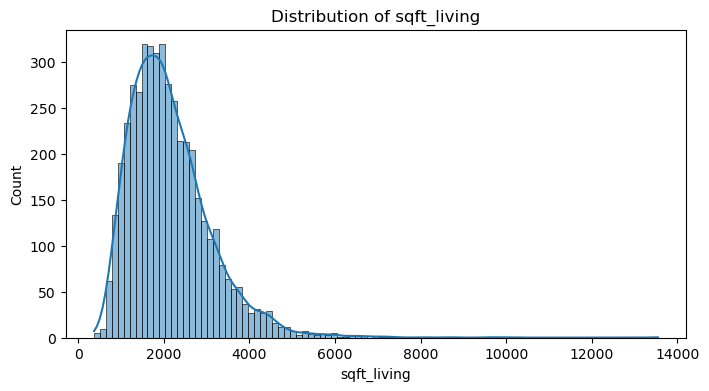

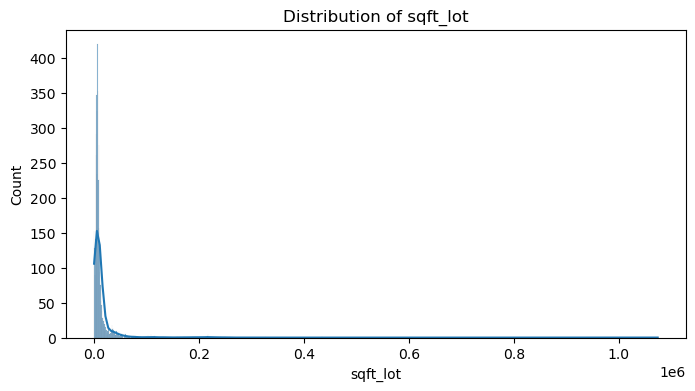

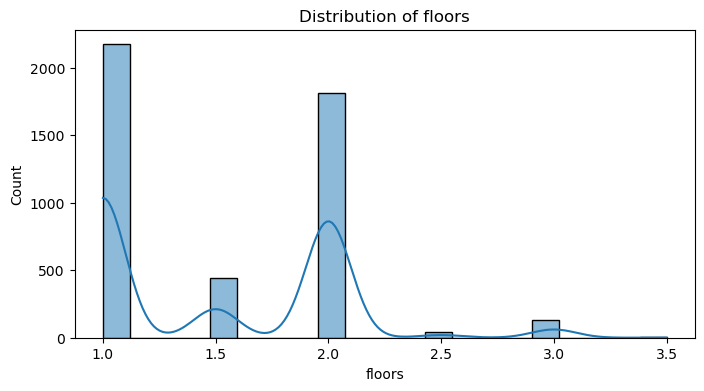

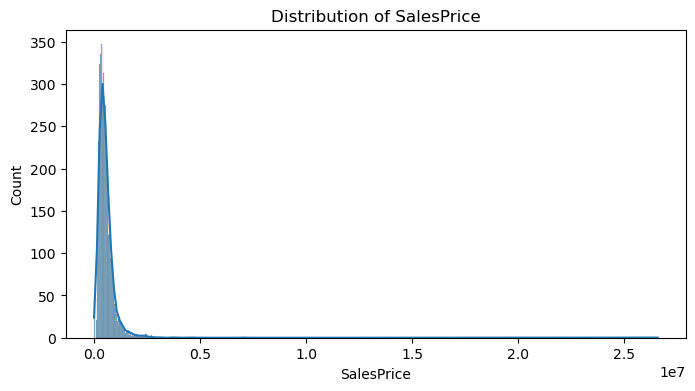

In [47]:
#5. Visualizing the Distribution of Each Feature

import matplotlib.pyplot as plt
import seaborn as sns

# List of features to visualize
features = ['sqft_living', 'sqft_lot', 'floors', 'SalesPrice']

# Plotting each feature
for feature in features:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()


### Linear Regression (Single Variable)

In [139]:
#6. Implementing a Linear Regression Model Manually
#Extract features and target variable:

from sklearn.linear_model import LinearRegression

X = df[['sqft_lot']].values  # Independent variable
y = df['SalesPrice'].values   # Target variable

#Fit a linear regression model:

lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [141]:
#Print coef and intercept

coef_slr = lin_reg.coef_[0]
intercept_slr = lin_reg.intercept_

#Print Coefficients:
print(f"Coefficient_slr: {coef}")
print(f"Intercept_slr: {intercept}")

Coefficient_slr: 0.7927166756315327
Intercept_slr: 540189.1512958274


In [142]:
#7. Calculate the Sum of Squared Errors

#Calculate predictions:
predictions = lin_reg.predict(X)

#Compute the SSE:
sse = ((predictions - y) ** 2).sum()
print("Sum of Squared Errors_slr:", sse)

Sum of Squared Errors_slr: 1458344675295682.8


In [144]:
R2 = r2_score(y,lin_reg.predict(X))
print("R2_slr : ",R2 )

R2_slr :  0.0025453331704339277


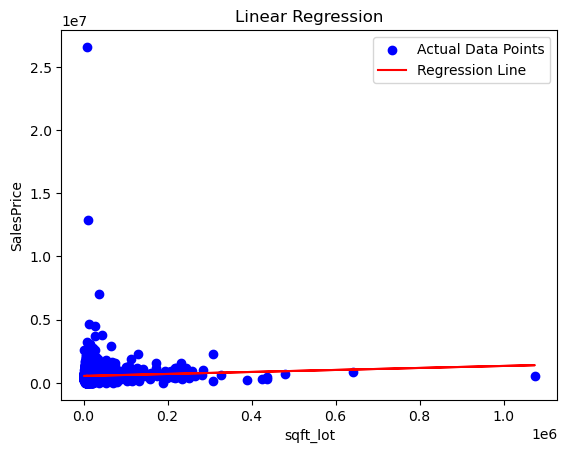

In [53]:
#8. Plot the Regression Line

import matplotlib.pyplot as plt
plt.scatter(X, y, color='blue', label='Actual Data Points')
plt.plot(X, predictions, color='red', label='Regression Line')
plt.xlabel('sqft_lot')
plt.ylabel('SalesPrice')
plt.title('Linear Regression')
plt.legend()
plt.show()

In [147]:
#9. Compare with sklearn's Linear Regression

from sklearn.linear_model import LinearRegression
X = df[['sqft_lot']]
y = df['SalesPrice']
lin_reg_sklearn = LinearRegression()
lin_reg_sklearn.fit(X, y)
print("Sklearn Coefficient:", lin_reg_sklearn.coef_[0])
print("Sklearn Intercept:", lin_reg_sklearn.intercept_)


Sklearn Coefficient: 0.7927166756315327
Sklearn Intercept: 540189.1512958274


In [146]:
#compare the coef and intercept with your model

# Coefficients from manual calculation
print("Manual Calculation Coefficients:")
print("coef (b1):", coef)
print("intercept (b0):", intercept)

# Coefficients from scikit-learn LinearRegression
print("\nSklearn Coefficients:")
print("Sklearn Coefficient:", lin_reg_sklearn.coef_[0])
print("Sklearn Intercept:", lin_reg_sklearn.intercept_)

Manual Calculation Coefficients:
coef (b1): 0.7927166756315327
intercept (b0): 540189.1512958274

Sklearn Coefficients:
Sklearn Coefficient: 0.7927166756315327
Sklearn Intercept: 540189.1512958274


### Linear Regression (Multivariate)

In [149]:
#10. Linear Regression with Multiple Features

from sklearn.linear_model import LinearRegression

#Extract features and target variable:
X = df[['sqft_living', 'sqft_lot']].values  # Independent variables
y = df['SalesPrice'].values # Target variable

#Fit a linear regression model:
lin_reg_multi = LinearRegression()
lin_reg_multi.fit(X, y)
coefs = lin_reg_multi.coef_
intercept = lin_reg_multi.intercept_
print("Coefficients_mlr:", coefs)
print("Intercept_mlr:", intercept)


Coefficients_mlr: [257.13000008  -0.66039049]
Intercept_mlr: 11681.165815586923


In [150]:
#11. Print R-squared (R²) Score

r_squared = lin_reg_multi.score(X, y)
print("R-squared Score_mlr:", r_squared)


R-squared Score_mlr: 0.1869409742537571


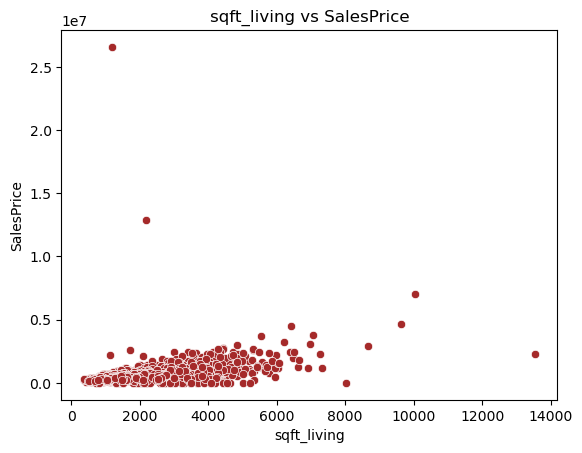

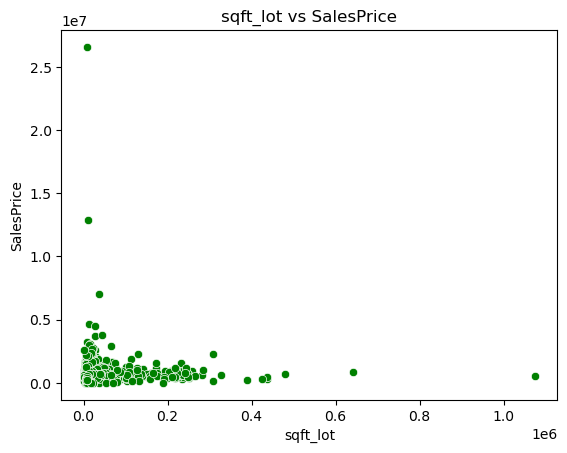

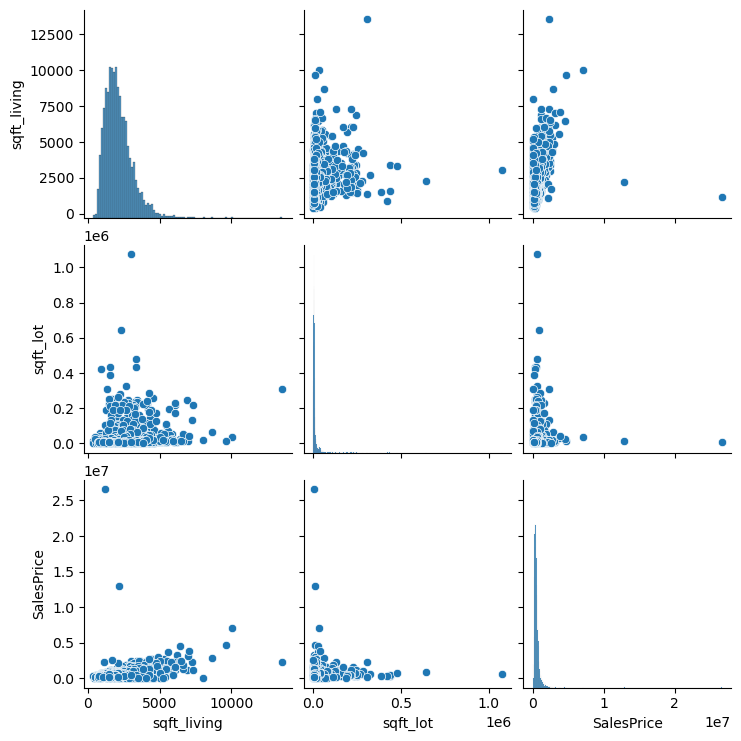

In [154]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatterplot for sqft_living vs SalesPrice
sns.scatterplot(x='sqft_living', y='SalesPrice', color='brown', data=df)
plt.title('sqft_living vs SalesPrice')
plt.show()

# Scatterplot for sqft_lot vs SalesPrice
sns.scatterplot(x='sqft_lot', y='SalesPrice', color='green', data=df)
plt.title('sqft_lot vs SalesPrice')
plt.show()

# Pairplot for both features and target variable
sns.pairplot(df[['sqft_living', 'sqft_lot', 'SalesPrice']])
plt.show()


### Polynomial Regression

In [ ]:
#. Use a polynomial feature's function and implement a polynomial regression model of degree 2 for the features sqft_lot and the target variable. 

In [158]:
#13. Polynomial Regression Model of Degree 2
#Extract feature and target variable:

from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

X = df[['sqft_lot']].values  # Independent variable
y = df['SalesPrice'].values   # Target variable

#Create polynomial features (degree 2):

poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

#Fit a polynomial regression model:

lin_reg_poly = LinearRegression()
lin_reg_poly.fit(X_poly, y)


LinearRegression()

In [159]:
#Polynomial Regression Coefficient*

coefficients = lin_reg_poly.coef_
print("Coefficients_poly:", coefficients)

# Get the intercept B0*
intercept = lin_reg_poly.intercept_
print("Intercept_poly:", intercept)


Coefficients_poly: [ 1.65511694e+00 -1.98125899e-06]
Intercept_poly: 530368.095943684


In [160]:
#14. Print R-squared Score for Polynomial Regression
#Calculate R-squared score:
from sklearn.metrics import r2_score
predictions = lin_reg_poly.predict(X_poly)
r_squared = r2_score(y, predictions)
print("R-squared (R²) score:", r_squared)


R-squared (R²) score: 0.00446670543314398


In [161]:
#15. Experiment with Different Polynomial Degrees

best_degree = 2
best_r2 = 0

for degree in range(2, 7):
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)
    lin_reg_poly = LinearRegression()
    lin_reg_poly.fit(X_poly, y)
    predictions = lin_reg_poly.predict(X_poly)
    r_squared = r2_score(y, predictions)

    if r_squared > best_r2:
        best_r2 = r_squared
        best_degree = degree

    print(f"Degree {degree}: R-squared Score = {r_squared}")

print(f"\nBest Degree: {best_degree} with R-squared: {best_r2}")

Degree 2: R-squared Score = 0.00446670543314398
Degree 3: R-squared Score = 0.007104702760799664
Degree 4: R-squared Score = 0.0017250395682146813
Degree 5: R-squared Score = 0.0005669714665620385
Degree 6: R-squared Score = 0.00018269514422619704

Best Degree: 3 with R-squared: 0.007104702760799664


##### The highest R-squared score is for Degree 3 (0.0071). While the R-squared values are low overall, Degree 3 seems to provide a slightly better fit than other degrees

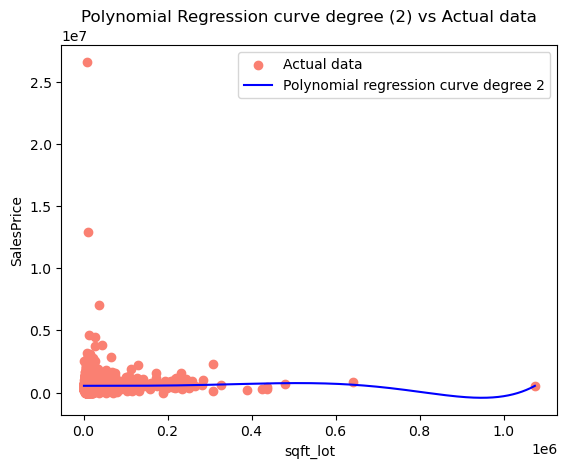

In [167]:
#16. Plot the Polynomial Regression Curve
plt.scatter(X, y, color='salmon', label='Actual data')
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.plot(X_grid, lin_reg_poly.predict(poly.transform(X_grid)), color='blue', label=f'Polynomial regression curve degree 2')
plt.xlabel('sqft_lot')
plt.ylabel('SalesPrice')
plt.title('Polynomial Regression curve degree (2) vs Actual data')
plt.legend()
plt.show()


### RANSAC (Robust Regression) 

In [116]:
#19.Apply RANSAC (Random Sample Consensus) to fit a robust linear regression model to the features sqft_lot and the target variable

from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import RANSACRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
df = pd.read_csv('HousePrice.csv')

#input
X = df[['sqft_lot']]

#output
y = df[['SalesPrice']]

ransac = RANSACRegressor(LinearRegression(), max_trials=100, min_samples=50)
ransac.fit(X, y)


RANSACRegressor(estimator=LinearRegression(), min_samples=50)

coef_ransac:  [[2.13885959]]
intercept_ransac:  [384856.98827083]


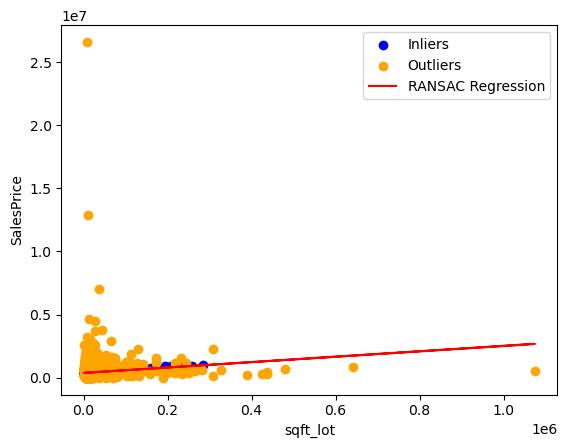

In [132]:
#20. Print coef and intercept. Visualize plot wrt inliers and outliers.

coef_ransac = ransac.estimator_.coef_
intercept_ransac = ransac.estimator_.intercept_

#RANSAC Coefficient:
print("coef_ransac: ", coef_ransac)

#RANSAC Intercept:
print("intercept_ransac: ",intercept_ransac)

# Obtain inlier and outlier masks
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

# Visualization of plot wrt inliers and outliers.

plt.scatter(X[inlier_mask], y[inlier_mask], c='blue', label='Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask], c='orange', label='Outliers')
plt.plot(X, ransac.predict(X), c='red', label='RANSAC Regression')
plt.xlabel('sqft_lot')
plt.ylabel('SalesPrice')
plt.legend()
plt.show()

In [130]:
#21. Print R-squared (R²) score with and without inliers.

R2_RANSAC = r2_score(y,ransac.predict(X))
print("R-squared (R²) score with : ",R2_RANSAC )

R2_RANSAC = r2_score(y[inlier_mask],ransac.predict(X[inlier_mask]))
print("R-squared (R²) score without inliners : ",R2_RANSAC )

R-squared (R²) score with :  -0.0624226252753004
R-squared (R²) score without inliners :  0.19944772660710597


### Model Evaluation:
#### Compare the results and discuss which model(s) best-predicted housing prices.

Let's analyze the results of each regression model and discuss which model best predicts housing prices. The key metrics for evaluation include the coefficients, intercept, Sum of Squared Errors (SSE), and R-squared score.

LINEAR REGRESSION (Single Variable):

Coefficient_slr: 0.7927166756315327

Intercept_slr: 540189.1512958274

SSE_slr: 1458344675295682.8

R-squared Score_slr: 0.0025453331704339277

LINEAR REGRESSION (Multivariate):

Coefficients_mlr: [257.13000008, -0.66039049]

Intercept_mlr: 11681.165815586923

R-squared Score_mlr: 0.1869409742537571

POLYNOMIAL REGRESSION:

Coefficients_poly: [1.65511694e+00, -1.98125899e-06]

Intercept_poly: 530368.095943684

R-squared Score_poly: 0.00446670543314398

RANSAC (ROBUST REGRESSION):

Coefficient_ransac: 2.13885959

Intercept_ransac: 384856.98827083

R-squared Score with inliers: -0.0624226252753004

R-squared Score without inliers: 0.19944772660710597



Now, let's discuss and compare the models:

Linear Regression (Single Variable):

The R-squared score is very low, indicating that this model explains a very small proportion of the variance in the data. The SSE is also quite high.
Linear Regression (Multivariate):

This model has a higher R-squared score compared to the single-variable linear regression, suggesting that including multiple variables improves the model's predictive power.
Polynomial Regression:

The R-squared score is still quite low, indicating that the polynomial features may not significantly improve the model's performance.
RANSAC (Robust Regression):

The R-squared score without outliers is higher than the other models, suggesting that this model is less affected by outliers. However, the R-squared score with outliers is negative, indicating a poor fit.
Conclusion:
The multivariate linear regression model appears to be the most promising among the models considered. It has the highest R-squared score, indicating better explanatory power compared to the other models. However, it's essential to note that the R-squared score is still relatively low, suggesting that the features used in the model may not be sufficient to accurately predict housing prices.

Further steps could include feature engineering, exploring more complex models, or collecting additional relevant features to improve the predictive performance of the model. Additionally, it would be beneficial to validate the model on a separate test dataset to ensure its generalization to new data.

# Life Expectancy prediction

In [290]:
import pandas as pd

# Ignore warnings to improve code readability
import warnings
warnings.filterwarnings('ignore')

#1. Load the dataset
df = pd.read_csv('LifeExpectancy.csv')

# Present the statistics of data
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2.938000e+03,2938.000000,2938.000000,2938.000000,2938.000000
mean,2007.518720,69.234717,164.725664,30.303948,4.546875,738.251295,83.022124,2419.592240,38.381178,42.035739,82.617767,5.924098,82.393125,1.742103,6611.523863,1.023085e+07,4.821886,4.852144,0.630362,12.009837
std,4.613841,9.509115,124.086215,117.926501,3.921946,1987.914858,22.996984,11467.272489,19.935375,160.445548,23.367166,2.400770,23.655562,5.077785,13296.603449,5.402242e+07,4.397621,4.485854,0.205140,3.265139
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.200000,74.000000,0.000000,1.092500,4.685343,82.000000,0.000000,19.400000,0.000000,78.000000,4.370000,78.000000,0.100000,580.486996,4.189172e+05,1.600000,1.600000,0.504250,10.300000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.755000,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.600000,227.000000,22.000000,7.390000,441.534144,96.000000,360.250000,56.100000,28.000000,97.000000,7.330000,97.000000,0.800000,4779.405190,4.584371e+06,7.100000,7.200000,0.772000,14.100000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [171]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [174]:
#2. Identify and specify the target variable

# Determine the dataset dimensions
num_rows = df.shape[0]  # Number of data points
num_columns = df.shape[1]  # Number of features

# Identify the target variable
target_variable = "Life expectancy"

# Report on the dataset dimensions
print(f"The dataset comprises {num_rows} data points and {num_columns - 1} features and 1 target column.")
print(f"Among the {num_columns} features, one of them is the '{target_variable}'. This means we have {num_columns - 1} different features that could potentially influence life expectancy. Let's explore these features further.")

print("\nTarget variable is 'Life Expectancy'")

The dataset comprises 2938 data points and 21 features and 1 target column.
Among the 22 features, one of them is the 'Life expectancy'. This means we have 21 different features that could potentially influence life expectancy. Let's explore these features further.

Target variable is 'Life Expectancy'


In [178]:
#3. Categorize the columns

categorical_columns = ['Country', 'Year', 'Status']

# Continuous columns
continuous_columns = [col for col in df.columns if col not in categorical_columns]

# Display the lists
print("Categorical Columns:\n", categorical_columns)

print("\nContinuous Columns:\n", continuous_columns)


Categorical Columns:
 ['Country', 'Year', 'Status']

Continuous Columns:
 ['Life expectancy', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles', 'BMI', 'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria', ' HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years', 'thinness 5-9 years', 'Income composition of resources', 'Schooling']


In [14]:
#4. Identify unique values

# Calculate the number of unique values in each column
unique_counts = df.nunique()

# Display the count of unique values in a transposed format
print("Count of Unique Values in Each Column:")
print(unique_counts)

Count of Unique Values in Each Column:
Country                             193
Year                                 16
Status                                2
Life expectancy                     362
Adult Mortality                     425
infant deaths                       209
Alcohol                            1077
percentage expenditure             2328
Hepatitis B                          87
Measles                             958
BMI                                 608
under-five deaths                   252
Polio                                73
Total expenditure                   819
Diphtheria                           81
 HIV/AIDS                           200
GDP                                2491
Population                         2279
thinness  1-19 years                200
thinness 5-9 years                  207
Income composition of resources     625
Schooling                           173
dtype: int64


In [15]:
# Identifying unique values from each column
unique_values = {col: df[col].unique() for col in df.columns}

# Display the unique values
for col, values in unique_values.items():
    print(f"Unique values in '{col}':", values)


Unique values in 'Country': ['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Antigua and Barbuda'
 'Argentina' 'Armenia' 'Australia' 'Austria' 'Azerbaijan' 'Bahamas'
 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin'
 'Bhutan' 'Bolivia (Plurinational State of)' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'Brunei Darussalam' 'Bulgaria' 'Burkina Faso'
 'Burundi' "Côte d'Ivoire" 'Cabo Verde' 'Cambodia' 'Cameroon' 'Canada'
 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia' 'Comoros'
 'Congo' 'Cook Islands' 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus' 'Czechia'
 "Democratic People's Republic of Korea"
 'Democratic Republic of the Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea'
 'Eritrea' 'Estonia' 'Ethiopia' 'Fiji' 'Finland' 'France' 'Gabon' 'Gambia'
 'Georgia' 'Germany' 'Ghana' 'Greece' 'Grenada' 'Guatemala' 'Guinea'
 'Guinea-Bissau' 'Guyana' 'Haiti' 'Honduras' 'Hungary' 'Iceland' 'India'
 'Indonesia' 

In [16]:
#5. Identify missing values
# Find the missing values in each column
missing_values = df.isnull().sum()
print("Missing Values in Each Column:")
print(missing_values)

Missing Values in Each Column:
Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
thinness  1-19 years               0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64


###### Determine Imputation Strategy:

###### For categorical columns, use the mode (most frequent value).
###### For continuous columns, check the distribution:
###### Use mean if the distribution is approximately normal.
###### Use median if the distribution is skewed.

In [18]:
# Categorical columns
categorical_columns = ['Country', 'Year', 'Status']

# Impute missing values
for col in df.columns:
    if col in categorical_columns:
        # Impute with mode for categorical columns
        mode = df[col].mode()[0]
        df[col].fillna(mode, inplace=True)
    else:
        # Check skewness for continuous columns
        if df[col].skew() > 1 or df[col].skew() < -1:
            # Impute with median for skewed distributions
            median = df[col].median()
            df[col].fillna(median, inplace=True)
        else:
            # Impute with mean for normal distributions
            mean = df[col].mean()
            df[col].fillna(mean, inplace=True)

##### Explanation:

##### Mode for categorical columns: Since these are discrete and often non-numeric, the most common value is the best estimate for missing data.
##### Median for skewed continuous columns: Median is less affected by outliers and extreme values, making it suitable for skewed distributions.
##### Mean for normal continuous columns: Mean is a good measure of central tendency for normally distributed data.

In [193]:
#6.Check for Outliers Using the IQR Method
# Assuming df is your DataFrame

# Calculate IQR for each column
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Determine outliers
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()
percentage_outliers = (outliers / len(df)) * 100

# Print outliers and percentage
result = pd.DataFrame({
    'Outliers Count': outliers,
    'Percentage of Outliers': percentage_outliers
})
print("Outliers using the IQR Method:\n", result)


Outliers using the IQR Method:
                                  Outliers Count  Percentage of Outliers
 HIV/AIDS                                   542               18.447924
Adult Mortality                              86                2.927161
Alcohol                                       3                0.102110
BMI                                           0                0.000000
Country                                       0                0.000000
Diphtheria                                  298               10.142954
GDP                                         445               15.146358
Hepatitis B                                 322               10.959837
Income composition of resources             130                4.424779
Life expectancy                              17                0.578625
Measles                                     542               18.447924
Polio                                       279                9.496256
Population                      

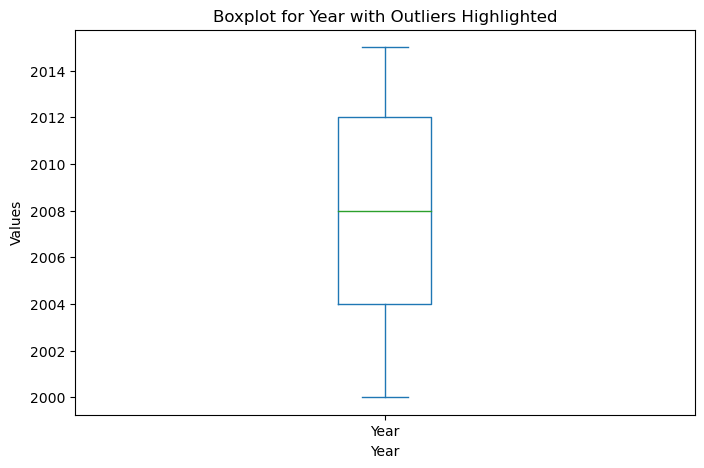

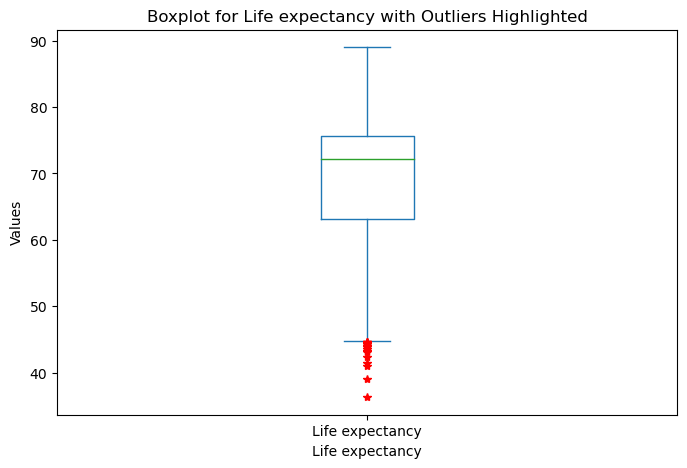

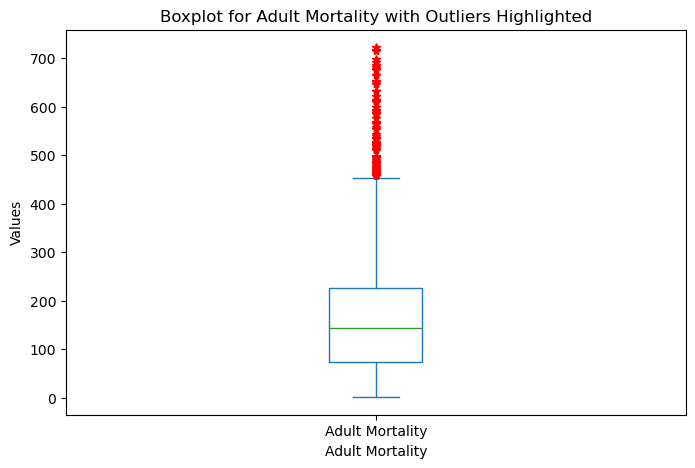

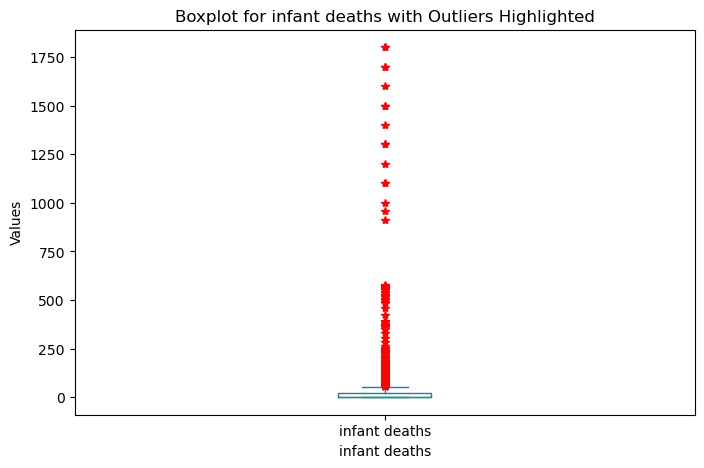

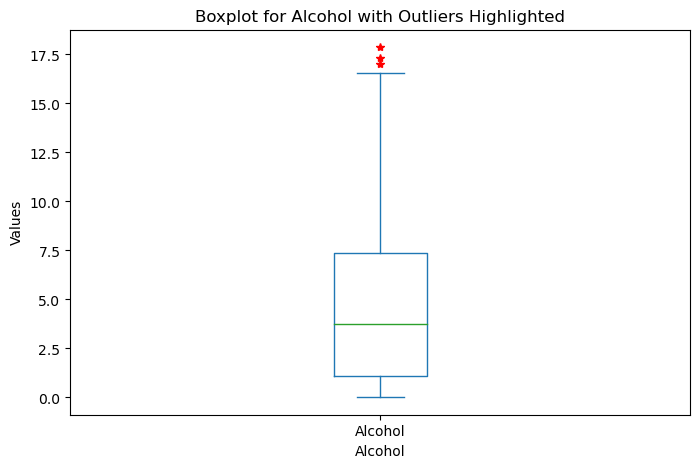

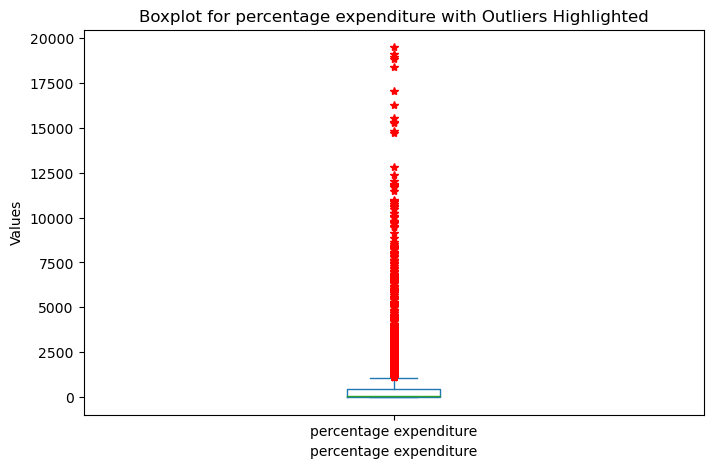

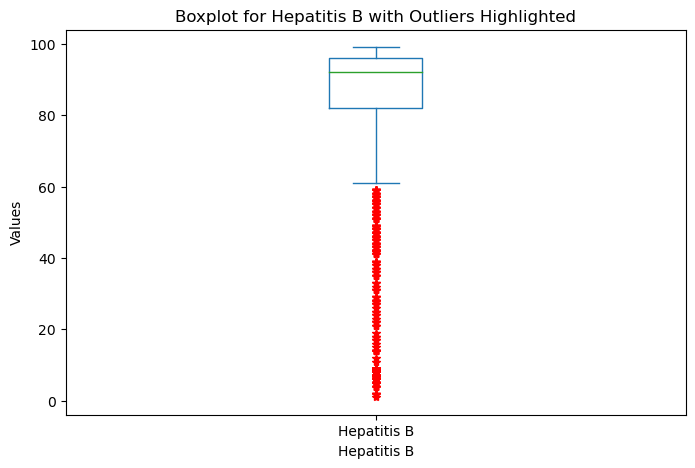

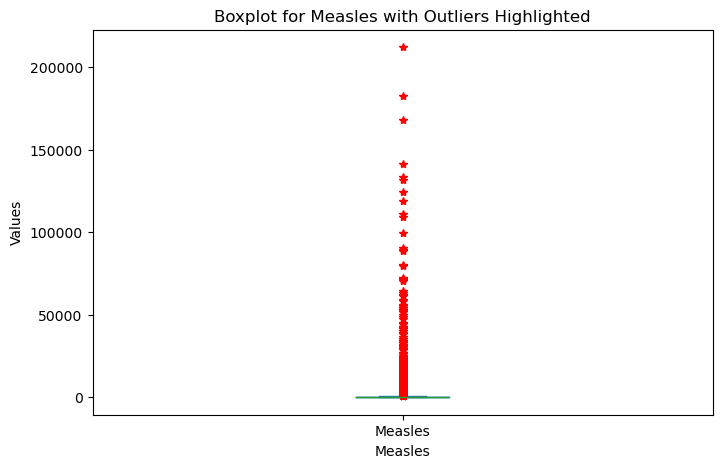

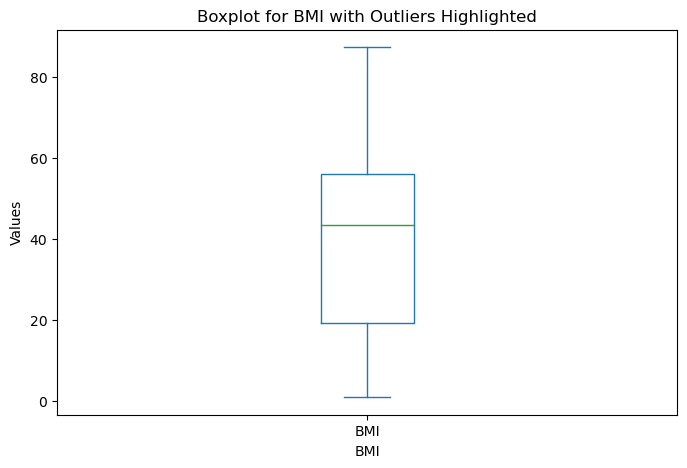

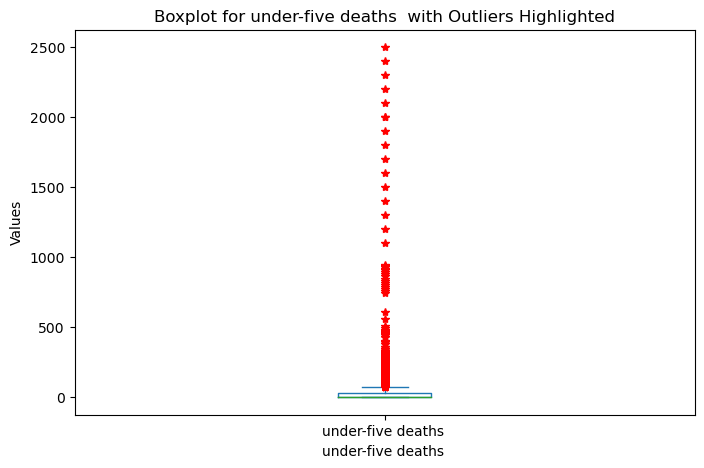

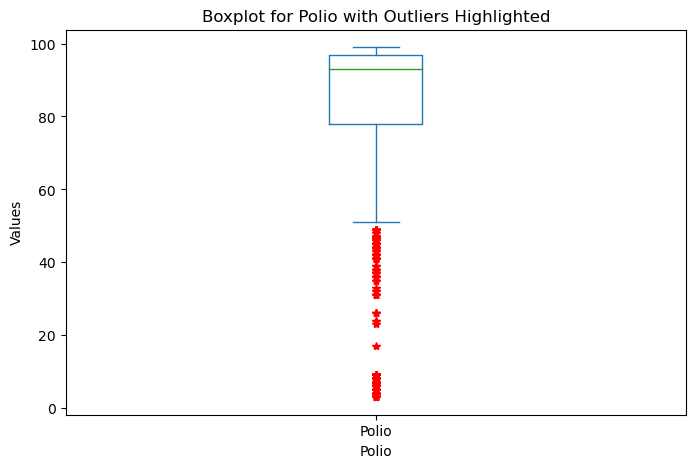

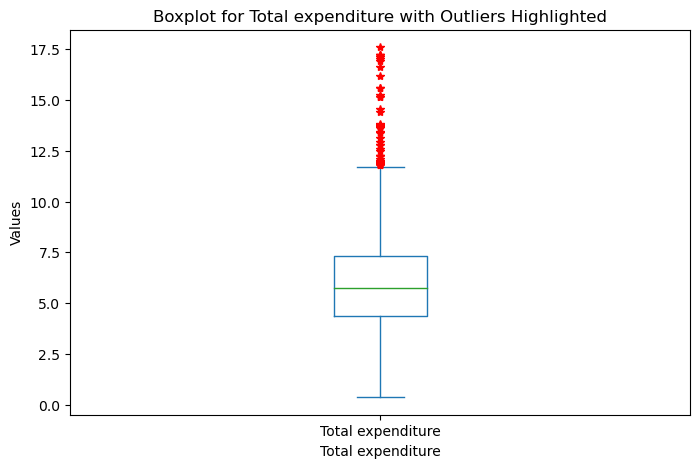

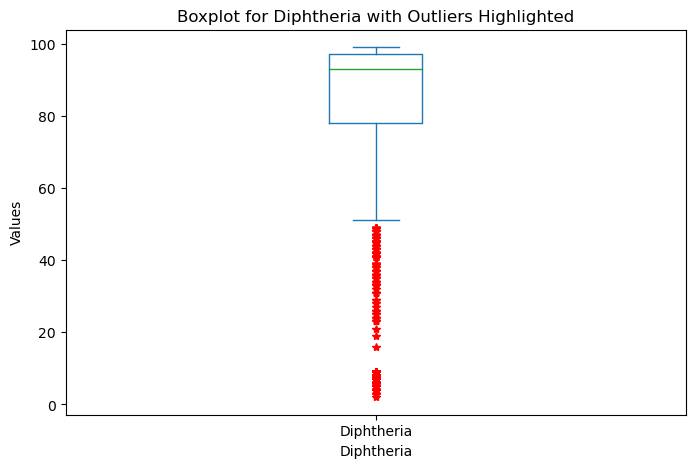

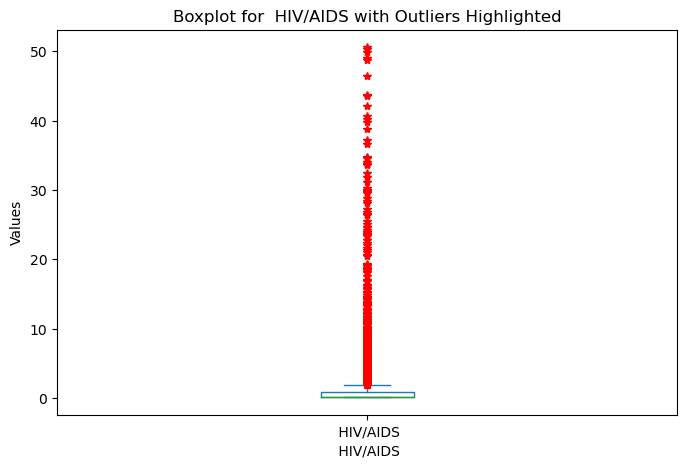

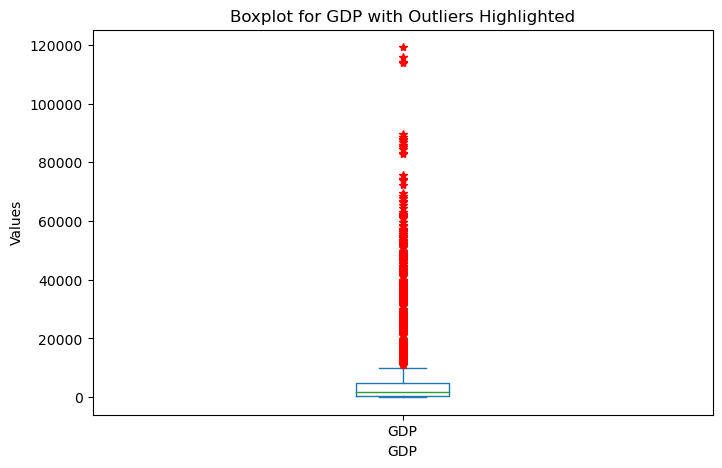

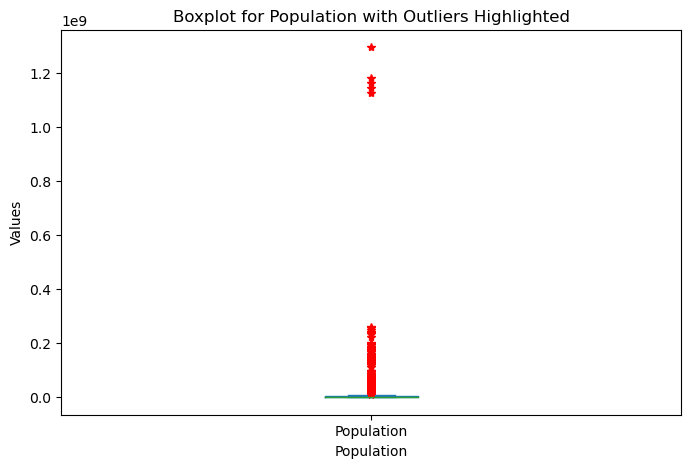

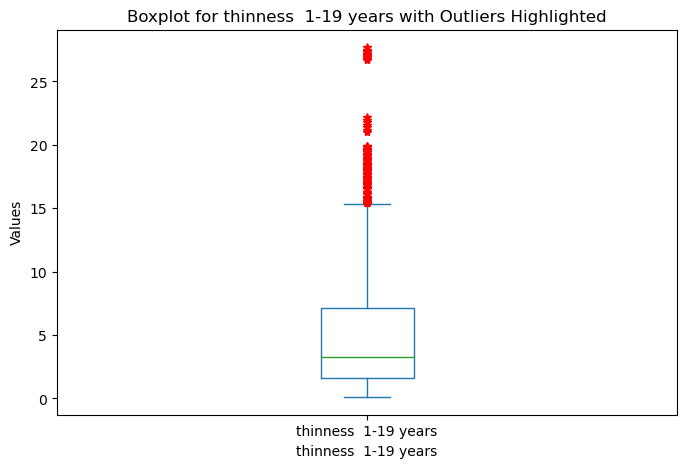

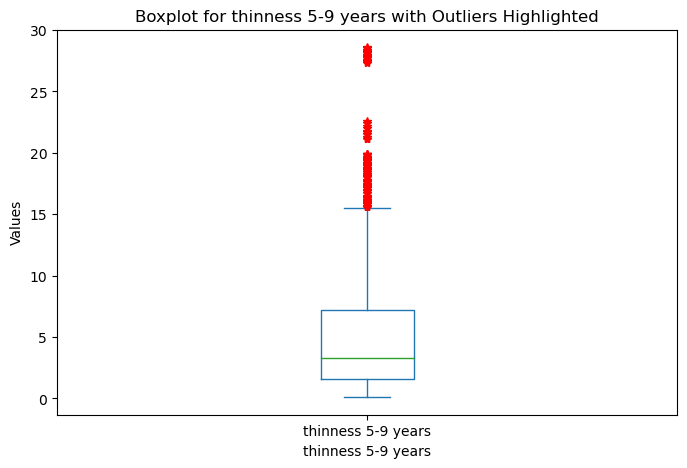

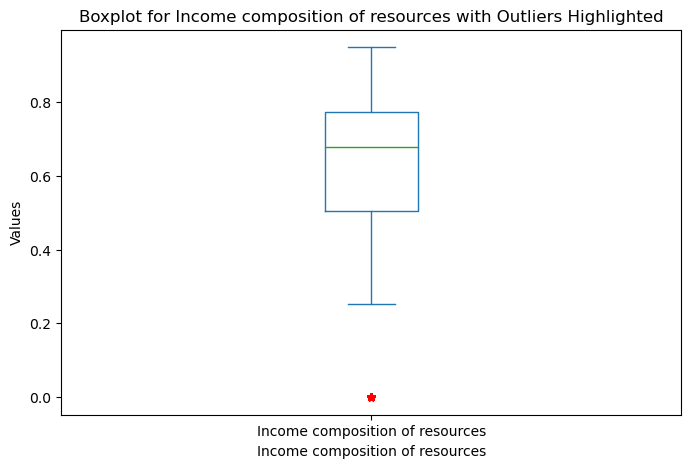

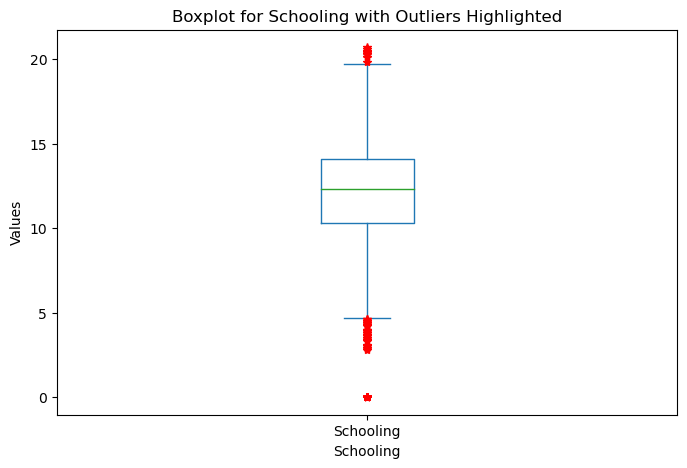

Outliers using the IQR Method:
                                  Outliers Count  Percentage of Outliers
Year                                          0                0.000000
Life expectancy                              17                0.578625
Adult Mortality                              86                2.927161
infant deaths                               315               10.721579
Alcohol                                       3                0.102110
percentage expenditure                      389               13.240300
Hepatitis B                                 322               10.959837
Measles                                     542               18.447924
BMI                                           0                0.000000
under-five deaths                           394               13.410483
Polio                                       279                9.496256
Total expenditure                            51                1.735875
Diphtheria                      

In [197]:
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_columns = df.select_dtypes(include=['number'])

# Check if there are any numeric columns
if not numeric_columns.empty:
    # Calculate IQR for each numeric column
    Q1 = numeric_columns.quantile(0.25)
    Q3 = numeric_columns.quantile(0.75)
    IQR = Q3 - Q1

    # Determine outliers
    outliers = ((numeric_columns < (Q1 - 1.5 * IQR)) | (numeric_columns > (Q3 + 1.5 * IQR)))

    # Calculate percentage of outliers
    percentage_outliers = (outliers.sum() / len(df)) * 100

    # Plot boxplot for each numeric column
    for column in numeric_columns.columns:
        plt.figure(figsize=(8, 5))
        numeric_columns[column].plot(kind='box', sym='r*')
        plt.title(f'Boxplot for {column} with Outliers Highlighted')
        plt.xlabel(column)
        plt.ylabel('Values')
        plt.show()

    # Print outliers and percentage
    result = pd.DataFrame({
        'Outliers Count': outliers.sum(),
        'Percentage of Outliers': percentage_outliers
    })
    print("Outliers using the IQR Method:\n", result)

else:
    print("No numeric columns found in the DataFrame.")


In [217]:
#Impute outliers

for col in df.columns:
    if df[col].dtype != 'object':  # For numerical columns
        if df[col].skew() < 1 and df[col].skew() > -1:  # Mild skewness
            mean = df[col].mean()
            df[col] = df[col].mask(((df[col] < (Q1[col] - 1.5 * IQR[col])) | (df[col] > (Q3[col] + 1.5 * IQR[col]))), mean)
        else:  # Significant skewness
            median = df[col].median()
            df[col] = df[col].mask(((df[col] < (Q1[col] - 1.5 * IQR[col])) | (df[col] > (Q3[col] + 1.5 * IQR[col]))), median)
    else:  # For categorical columns
        mode = df[col].mode()[0]
        df[col] = df[col].mask(df[col].isna(), mode)

# Display the modified dataset
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,3,0.01,71.279624,65.0,17,...,93.0,8.16,65.0,0.1,584.259210,1386542.0,3.3,3.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,3,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,3.3,3.3,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,3,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,1386542.0,3.3,3.3,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,3,0.01,78.184215,67.0,17,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,3.3,3.3,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,3,0.01,7.097109,68.0,17,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,3.3,3.3,0.454,9.5


In [23]:
import pandas as pd

# Assuming your data is already loaded into a DataFrame named 'df'
# If not, you can load it using: df = pd.read_csv('path_to_your_file.csv')

# Function to detect outliers using IQR
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Impute outliers in each column and print the result
for col in df.columns:
    if df[col].dtype != 'object':  # Only checking numerical columns
        outliers = detect_outliers(df, col)
        if not outliers.empty:
            # Impute with median if the distribution is skewed
            if df[col].skew() > 1 or df[col].skew() < -1:
                median = df[col].median()
                df.loc[outliers.index, col] = median
                print(f"Imputed outliers in column '{col}' with median: {median}")
            else:
                # Impute with mean if the distribution is approximately normal
                mean = df[col].mean()
                df.loc[outliers.index, col] = mean
                print(f"Imputed outliers in column '{col}' with mean: {mean}")
    else:
        # For categorical columns, impute outliers with mode
        mode = df[col].mode()[0]
        df.loc[outliers.index, col] = mode
        print(f"Imputed outliers in column '{col}' with mode: {mode}")


Imputed outliers in column 'Country' with mode: Afghanistan
Imputed outliers in column 'Status' with mode: Developing
Imputed outliers in column 'Life expectancy' with mean: 69.23471749489448
Imputed outliers in column 'Adult Mortality' with median: 144.0
Imputed outliers in column 'infant deaths' with median: 3.0
Imputed outliers in column 'Alcohol' with mean: 4.546875425459497
Imputed outliers in column 'percentage expenditure' with median: 64.912906045
Imputed outliers in column 'Hepatitis B' with median: 92.0
Imputed outliers in column 'Measles' with median: 17.0
Imputed outliers in column 'under-five deaths ' with median: 4.0
Imputed outliers in column 'Polio' with median: 93.0
Imputed outliers in column 'Total expenditure' with mean: 5.924098025867937
Imputed outliers in column 'Diphtheria' with median: 93.0
Imputed outliers in column ' HIV/AIDS' with median: 0.1
Imputed outliers in column 'GDP' with median: 1766.947595
Imputed outliers in column 'Population' with median: 1386542

In [26]:
#8. Calculate summary statistics for numerical columns
summary_statistics = df.describe()

# Display the summary statistics
print("Summary Statistics for Numerical Columns:\n")
summary_statistics.T


Summary Statistics for Numerical Columns:



,count,mean,std,min,25%,50%,75%,max
Year,2938.0,2.007519e+03,4.613841e+00,2000.00000,2004.000000,2.008000e+03,2.012000e+03,2.015000e+03
Life expectancy,2938.0,6.941213e+01,9.259694e+00,45.30000,63.500000,7.210000e+01,7.560000e+01,8.900000e+01
Adult Mortality,2938.0,1.506296e+02,1.004247e+02,1.00000,74.000000,1.440000e+02,2.157500e+02,4.340000e+02
infant deaths,2938.0,3.429884e+00,4.541642e+00,0.00000,0.000000,3.000000e+00,3.000000e+00,2.200000e+01
Alcohol,2938.0,4.533761e+00,3.900368e+00,0.01000,1.092500,3.755000e+00,7.380000e+00,1.658000e+01
percentage expenditure,2938.0,7.035779e+01,8.671712e+01,0.00000,4.685343,6.487035e+01,6.491291e+01,4.151628e+02
Hepatitis B,2938.0,9.275834e+01,4.108771e+00,79.00000,92.000000,9.200000e+01,9.600000e+01,9.900000e+01
Measles,2938.0,1.307931e+01,1.606800e+01,0.00000,0.000000,1.700000e+01,1.700000e+01,9.000000e+01
BMI,2938.0,3.838118e+01,1.993537e+01,1.00000,19.400000,4.350000e+01,5.610000e+01,8.730000e+01
under-five deaths,2938.0,3.778080e+00,4.514091e+00,0.00000,0.000000,4.000000e+00,4.000000e+00,2.200000e+01


In [198]:
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
lencode = LabelEncoder()

# Assuming 'Status' is a categorical column in the DataFrame
# Performing label encoding on 'Status'
label_encode_col = ['Country', 'Status']

#performing label encoding:
for column in label_encode_col:
    df[column] = lencode.fit_transform(df[column])

after_encoding = df.sample(10)
after_encoding


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1639,104,2010,0,83.0,62.0,0,7.91,278.068705,75.0,0,...,76.0,8.30,76.0,0.1,2187.794690,41458.0,0.8,0.7,0.819,14.6
1903,123,2005,1,49.2,4.0,556,9.71,6.416253,18.0,110927,...,45.0,4.11,36.0,5.4,87.893874,138939478.0,12.9,12.9,0.463,8.9
2749,181,2012,1,76.5,8.0,1,1.75,3663.764502,96.0,132,...,96.0,3.45,96.0,0.1,42112.235650,1386542.0,5.1,5.0,0.826,13.3
1173,75,2012,0,82.5,5.0,0,7.81,6818.546407,92.0,0,...,89.0,8.68,89.0,0.1,44333.851800,32716.0,1.0,0.9,0.901,18.7
536,32,2007,1,49.4,394.0,46,0.42,5.962924,92.0,441,...,38.0,3.35,28.0,4.9,81.683884,177578.0,1.0,1.0,0.306,5.7
2040,134,2014,0,77.3,12.0,2,10.71,243.808475,96.0,0,...,94.0,6.35,98.0,0.1,14341.675000,3811735.0,1.9,2.1,0.850,16.4
2189,144,2010,1,72.5,162.0,0,7.00,0.000000,99.0,0,...,99.0,4.71,99.0,0.1,1766.947595,1386542.0,3.5,3.5,0.711,13.3
1636,104,2013,0,81.1,57.0,0,8.58,374.294728,94.0,0,...,99.0,9.89,99.0,0.1,2393.188800,423374.0,0.8,0.7,0.828,14.2
2328,153,2000,0,78.3,78.0,0,2.03,1855.828806,97.0,141,...,98.0,2.71,98.0,0.1,23792.677000,1386542.0,2.1,2.0,0.810,12.5
1969,129,2005,1,75.8,122.0,1,5.53,623.910050,92.0,0,...,88.0,7.48,92.0,0.1,4916.548860,333465.0,2.1,2.1,0.740,12.9


#### (a) Choosing Columns for Label Encoding
#### Country: Since each country name is a categorical variable and there are likely many unique countries, converting them into numerical form would be efficient for modeling.
#### Status: If this column contains categorical data like 'Developed' or 'Developing', label encoding can be applied to convert these categories into numerical form.



#### (b) What is Label Encoding and Its Impact on the Dataset
#### Label encoding is a process of converting categorical text data into a numerical format. Each unique category within a column is assigned a numerical value.

### How Label Encoding Changes the Dataset:

#### Text to Numeric Conversion: It converts categorical text data into a numeric format, allowing machine learning models to interpret and process this data.
#### Ordinal Nature: Label encoding implicitly introduces an ordinal relationship (e.g., 0 < 1 < 2) among categories. This is something to be cautious about as it can lead to incorrect assumptions by the model if the categorical data is nominal (i.e., without intrinsic order).
#### Simplicity and Efficiency: It's simple and efficient, especially useful for datasets with a large number of categories in a column.

In [202]:
#10. Perform data normalization on ‘Adult Mortality', 'BMI', 'GDP’ numerical columns using StandardScaler() 

from sklearn.preprocessing import StandardScaler

# Select the columns to normalize
columns_to_normalize = ['Adult Mortality', 'BMI', 'GDP']

# Initialize the StandardScaler
scaler = StandardScaler()

# Normalize the selected columns and update the dataframe
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

# Display the first few rows to see the normalized data
df[columns_to_normalize]


,Adult Mortality,BMI,GDP
0,0.792119,-0.967349,-0.453371
1,0.856601,-0.992434,-0.451232
2,0.832421,-1.017519,-0.449799
3,0.864662,-1.042605,-0.446924
4,0.888843,-1.062673,-0.492539
...,...,...,...
2933,4.499850,-0.565984,-0.463141
2934,4.435368,-0.586052,-0.463218
2935,-0.739335,-0.606120,-0.493005
2936,4.201620,-0.626188,-0.456054


In [213]:
#11. Compute a correlation matrix and plot the correlation using a heat map and answer the following questions:import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
correlation_matrix = df.corr()
correlation_matrix

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Year,1.000000,0.170819,-0.079535,-0.037415,-0.069147,0.031400,0.021302,-0.082493,0.108484,-0.042937,0.091388,0.074552,0.131373,-0.139741,0.091480,0.014027,-0.047827,-0.050859,0.236594,0.203517
Life expectancy,0.170819,1.000000,-0.696390,-0.196769,0.388918,0.381418,0.170219,-0.157767,0.556901,-0.222738,0.458399,0.208844,0.472211,-0.556703,0.430461,-0.029014,-0.468002,-0.462473,0.688662,0.713054
Adult Mortality,-0.079535,-0.696390,1.000000,0.078890,-0.190191,-0.242628,-0.123287,0.031293,-0.379092,0.094280,-0.270002,-0.111796,-0.270301,0.523886,-0.281434,-0.005292,0.296135,0.301634,-0.436332,-0.433415
infant deaths,-0.037415,-0.196769,0.078890,1.000000,-0.112918,-0.085612,-0.167421,0.501128,-0.226796,0.996629,-0.170896,-0.126268,-0.175376,0.025231,-0.102829,0.551667,0.464811,0.470445,-0.141571,-0.190951
Alcohol,-0.069147,0.388918,-0.190191,-0.112918,1.000000,0.344410,0.090850,-0.049752,0.313022,-0.109790,0.211744,0.296153,0.212388,-0.046235,0.313060,-0.026836,-0.413021,-0.402034,0.418372,0.498899
percentage expenditure,0.031400,0.381418,-0.242628,-0.085612,0.344410,1.000000,0.039528,-0.056596,0.227408,-0.087852,0.146148,0.175559,0.142506,-0.097857,0.901819,-0.016888,-0.249610,-0.251144,0.374730,0.386076
Hepatitis B,0.021302,0.170219,-0.123287,-0.167421,0.090850,0.039528,1.000000,-0.073021,0.112441,-0.170549,0.364890,0.055988,0.449151,-0.085497,0.076660,-0.125006,-0.097576,-0.100576,0.117652,0.141275
Measles,-0.082493,-0.157767,0.031293,0.501128,-0.049752,-0.056596,-0.073021,1.000000,-0.176069,0.507809,-0.136669,-0.104133,-0.142385,0.030899,-0.069253,0.237188,0.224870,0.221138,-0.111089,-0.120799
BMI,0.108484,0.556901,-0.379092,-0.226796,0.313022,0.227408,0.112441,-0.176069,1.000000,-0.237048,0.281260,0.230745,0.280267,-0.243383,0.273932,-0.069667,-0.532487,-0.539365,0.471947,0.499806
under-five deaths,-0.042937,-0.222738,0.094280,0.996629,-0.109790,-0.087852,-0.170549,0.507809,-0.237048,1.000000,-0.188864,-0.127960,-0.195808,0.038062,-0.106093,0.539260,0.466697,0.471167,-0.159264,-0.206242


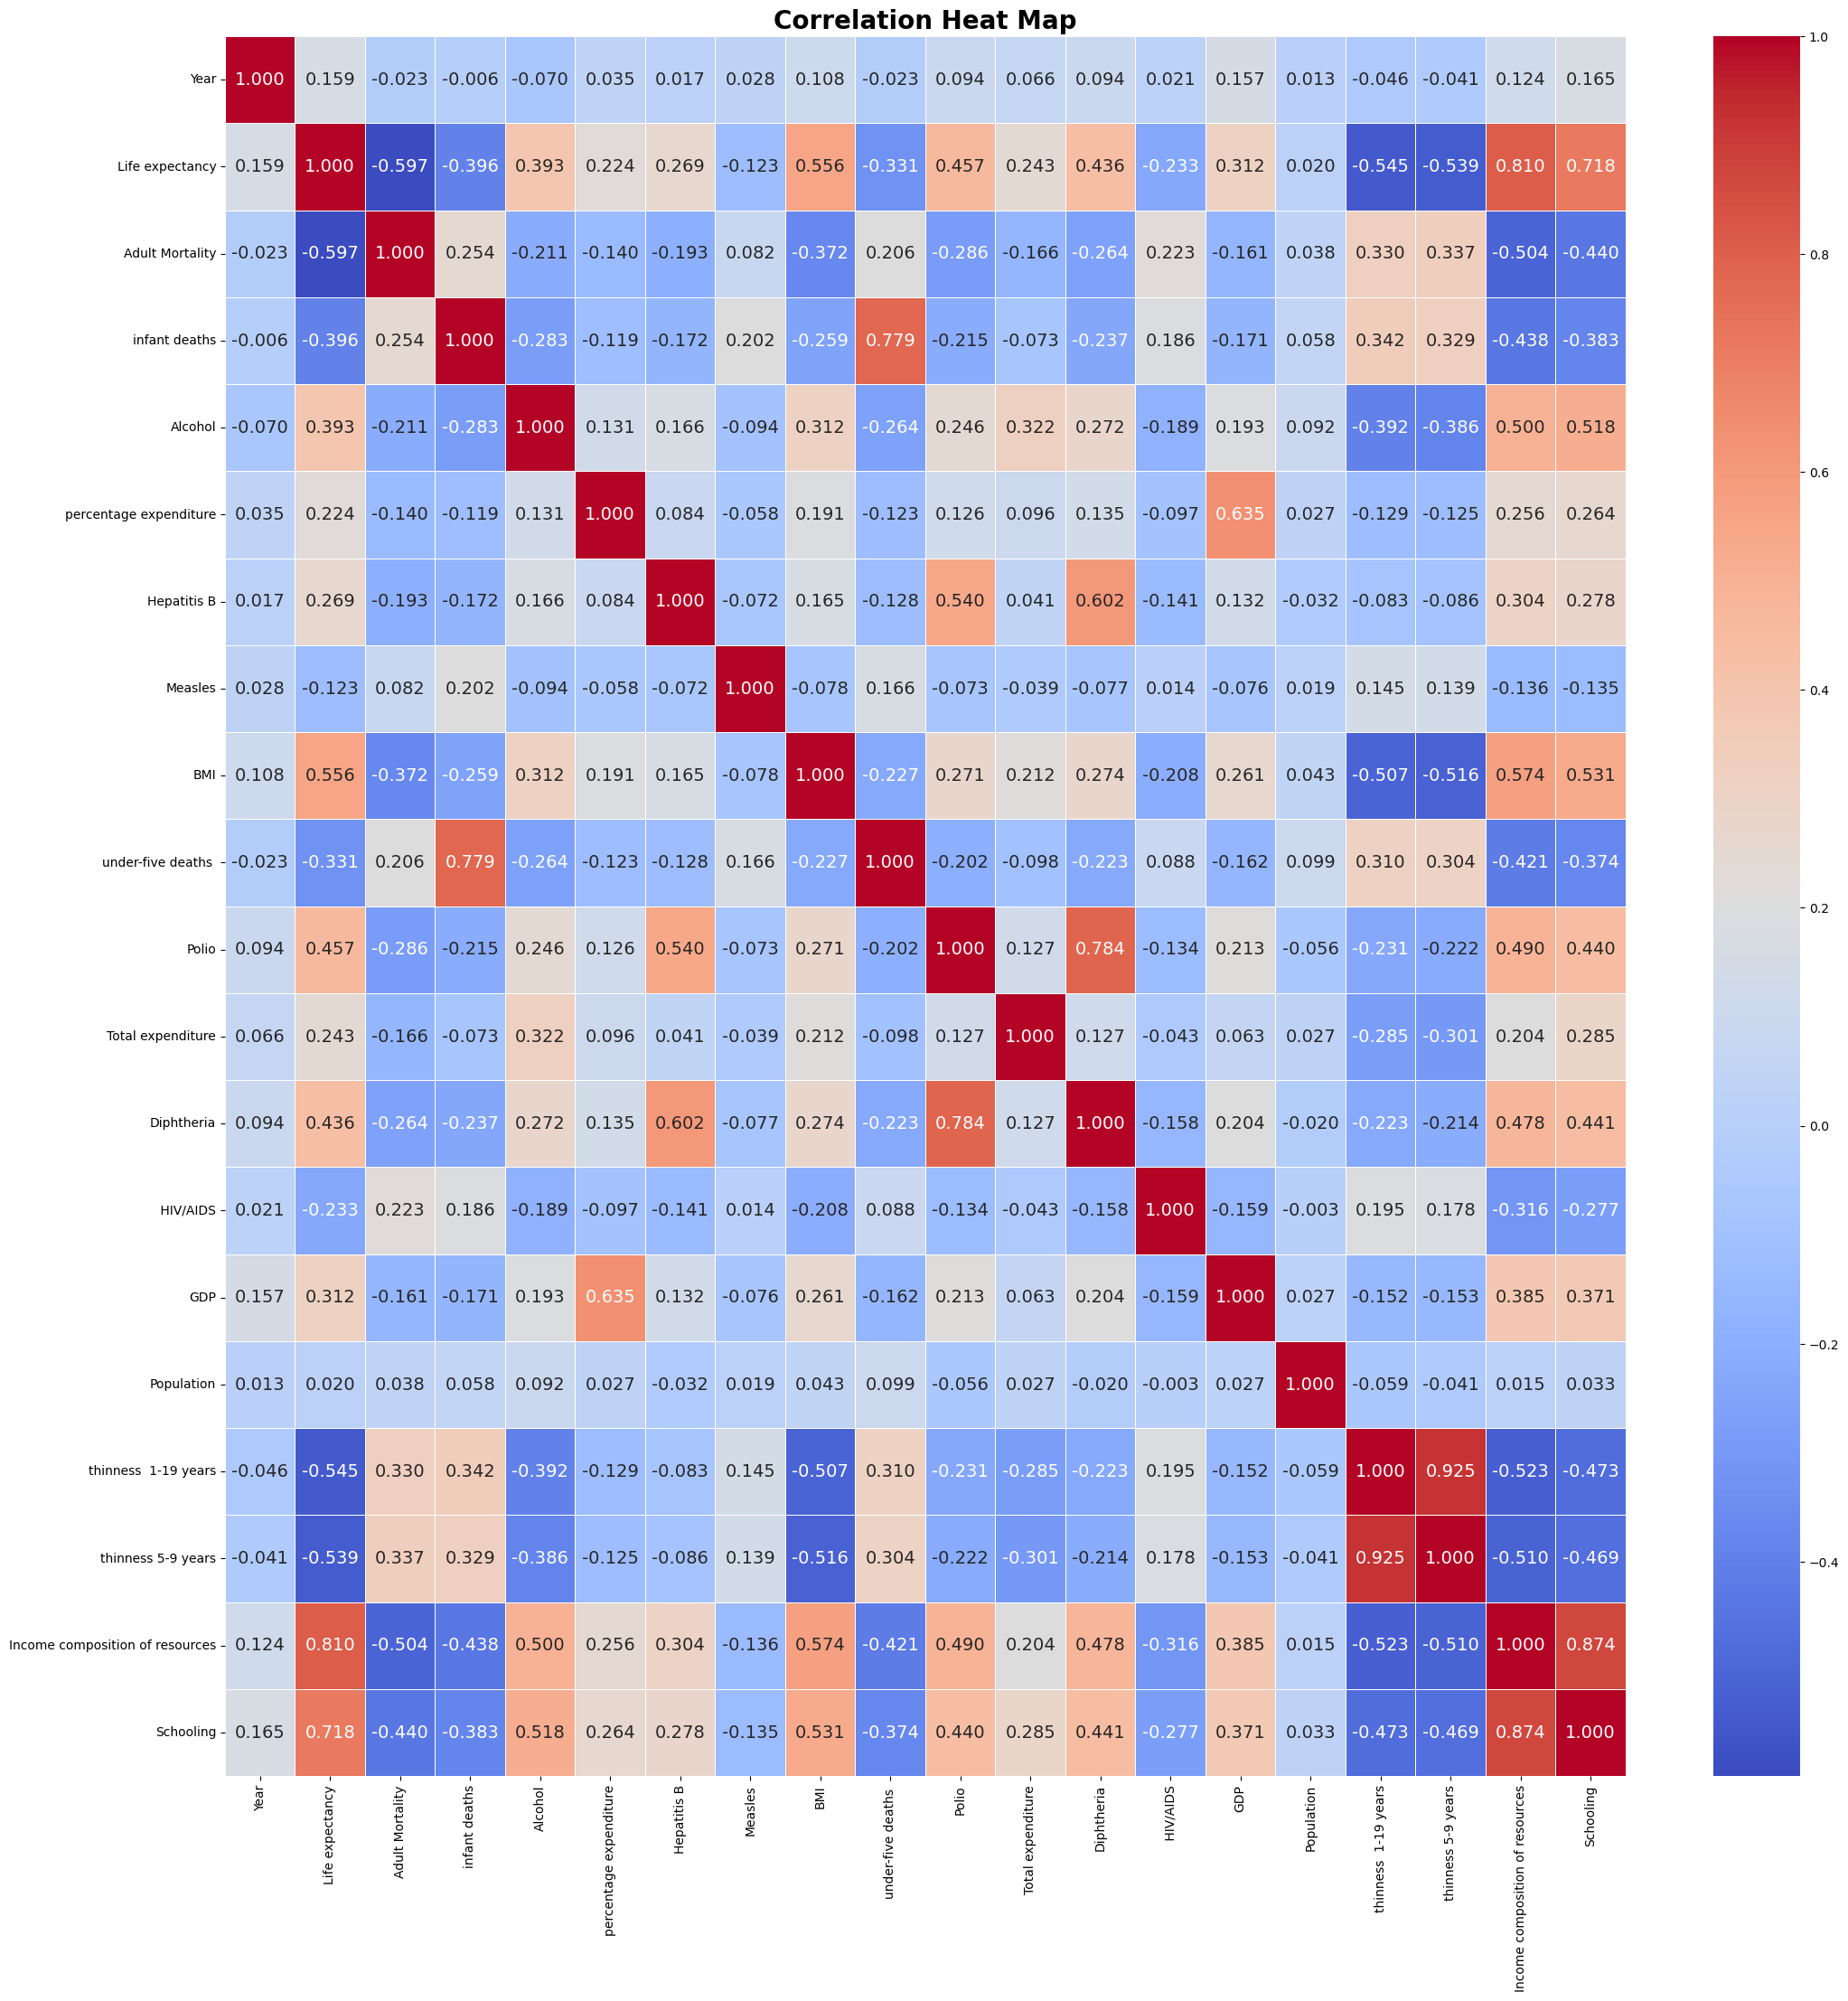

In [227]:
# Assuming df is your DataFrame
correlation_matrix = df.corr()

# Plot the correlation matrix using a heat map with increased text size
plt.figure(figsize=(25, 25))
correlation_heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.3f', linewidths=.5, annot_kws={"size": 14})

# Adjust x-axis and y-axis label font size
heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=16)
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=16)

plt.title('Correlation Heat Map', fontsize=20, fontweight='bold')
plt.show()

In [229]:
#(a) The Features which are Most Positively Correlated with target variable.# Identify features most positively and negatively correlated with the target variable

target_variable = 'Life expectancy'
positive_corr_features = correlation_matrix[target_variable].sort_values(ascending=False).index[1:6]

# Display results
print("Features Most Positively Correlated with Life expectancy:")
df[positive_corr_features].head()



Features Most Positively Correlated with Life expectancy:


,Income composition of resources,Schooling,BMI,Polio,Diphtheria
0,0.479,10.1,19.1,93.0,65.0
1,0.476,10.0,18.6,58.0,62.0
2,0.470,9.9,18.1,62.0,64.0
3,0.463,9.8,17.6,67.0,67.0
4,0.454,9.5,17.2,68.0,68.0


In [228]:
#(b) The Features which are Most Negatively Correlated with target variable

negative_corr_features = correlation_matrix[target_variable].sort_values().index[0:5]

print("\nFeatures Most Negatively Correlated with Life expectancy:")
df[negative_corr_features].head()


Features Most Negatively Correlated with Life expectancy:


,Adult Mortality,thinness 1-19 years,thinness 5-9 years,infant deaths,under-five deaths
0,263.0,3.3,3.3,3,4
1,271.0,3.3,3.3,3,4
2,268.0,3.3,3.3,3,4
3,272.0,3.3,3.3,3,4
4,275.0,3.3,3.3,3,4


In [287]:
# 12: Split Dataset into Training and Testing Sets

# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv('LifeExpectancy.csv')  # Replace with your file path

# Dropping the 'country' column
df.drop('Country', axis=1, inplace=True)

# Split the dataset into features and target variable
X = df.drop('Life expectancy', axis=1)  # Replace 'target_variable' with your actual target column name
y = df['Life expectancy']

# Splitting the dataset into training and testing sets (70:30 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Displaying the sizes of the splits
print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")
print(f"Training set size: {y_train.shape}")
print(f"Testing set size: {y_test.shape}")


Training set size: (2056, 20)
Testing set size: (882, 20)
Training set size: (2056,)
Testing set size: (882,)


In [267]:
#13. Linear regression model using the training and testing datasets and compute mean absolute error

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# One-hot encoding for the 'Status' column
df = pd.get_dummies(df, columns=['Status'])

# Assuming 'LifeExpectancy' is the target variable
X = df.drop(['Life expectancy'], axis=1)
y = df['Life expectancy']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 2.9673725492482714


In [268]:
#14. linear regression model using mini batch gradient descent and stochastic gradient descent with alpha=0.0001, learning rate='invscaling', maximum iterations =1000, batch size=32 and compute mean absolute error.

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_absolute_error
import numpy as np

# Assuming df, train_test_split, and other necessary libraries are already imported

# Separating the features and the target variable
X = df.drop(['Life expectancy'], axis=1)  # Replace 'Life expectancy' with the correct column name
y = df['Life expectancy']

# Splitting the dataset into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Stochastic Gradient Descent
sgd_regressor = SGDRegressor(alpha=0.0001, learning_rate='invscaling', max_iter=1000, random_state=42)
sgd_regressor.fit(X_train, y_train)
sgd_predictions = sgd_regressor.predict(X_test)
sgd_mae = mean_absolute_error(y_test, sgd_predictions)
print("SGD Mean Absolute Error:", sgd_mae)

# Mini-Batch Gradient Descent
mbgd_regressor = SGDRegressor(alpha=0.0001, learning_rate='invscaling', max_iter=1, random_state=42)
batch_size = 32
n_batches = int(np.ceil(X_train.shape[0] / batch_size))

for epoch in range(1000):  # Number of epochs
    for i in range(n_batches):
        start_index = i * batch_size
        end_index = start_index + batch_size
        X_batch = X_train[start_index:end_index]
        y_batch = y_train[start_index:end_index]
        mbgd_regressor.partial_fit(X_batch, y_batch)

mbgd_predictions = mbgd_regressor.predict(X_test)
mbgd_mae = mean_absolute_error(y_test, mbgd_predictions)
print("MBGD Mean Absolute Error:", mbgd_mae)


SGD Mean Absolute Error: 1.3010326493277378e+24
MBGD Mean Absolute Error: 1.7751440184298453e+23


In [301]:
#15. Build a linear regression model using mini batch gradient descent with learning rate =0.0001, maximum iterations =1000 and batch size=32. Manually without using any scikit learn libraries.import pandas as pd

import numpy as np

# Assuming X_train and y_train are your training data
# X_train should be a DataFrame with features, and y_train should be the target variable

# Generate a sample dataset (replace this with your actual dataset)
np.random.seed(42)
X_train = pd.DataFrame(np.random.rand(100, 5), columns=['feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5'])
y_train = 3 * X_train['feature_1'] + 2 * X_train['feature_2'] + np.random.randn(100)  # Replace with your target variable

# Mini-batch gradient descent parameters
learning_rate = 0.0001
max_iterations = 1000
batch_size = 32

# Add a column of ones to X_train for the intercept
X_b = np.c_[np.ones((len(X_train), 1)), X_train.values]

# Convert y_train to a 2D array
y = y_train.values.reshape(-1, 1)

# Initialize weights
theta = np.random.randn(X_b.shape[1], 1)

for iteration in range(max_iterations):
    shuffled_indices = np.random.permutation(X_b.shape[0])
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]

    for i in range(0, X_b.shape[0], batch_size):
        xi = X_b_shuffled[i:i+batch_size]
        yi = y_shuffled[i:i+batch_size]

        gradients = 2/batch_size * xi.T.dot(xi.dot(theta) - yi)
        theta -= learning_rate * gradients.reshape(-1, 1)  # Reshape gradients to match theta dimensions

# Assuming X_test and y_test are your test data
# X_test should be a DataFrame with features, and y_test should be the target variable

# Generate a sample test dataset (replace this with your actual test dataset)
X_test = pd.DataFrame(np.random.rand(20, 5), columns=['feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5'])
y_test = 3 * X_test['feature_1'] + 2 * X_test['feature_2'] + np.random.randn(20)  # Replace with your target variable

# Add a column of ones to X_test for the intercept
X_test_b = np.c_[np.ones((len(X_test), 1)), X_test.values]

# Make predictions
y_pred = X_test_b.dot(theta)

# Compute Mean Absolute Error
mae = np.mean(np.abs(y_pred - y_test.values.reshape(-1, 1)))

print("MBGD Mean Absolute Error:", mae)


MBGD Mean Absolute Error: 1.4969862479136977


# Comparing the results from each approach and also explain the difference between mini batch gradient descent and stochastic gradient descent..

#### Differences between Mini Batch Gradient Descent and Stochastic Gradient Descent:

#### Stochastic Gradient Descent (SGD) updates the model's parameters (weights) using each training data instance individually. After each instance, it calculates the gradient and updates the model. This can lead to very frequent updates, which are computationally intensive but may help the model to converge faster for large datasets.

#### Mini Batch Gradient Descent, on the other hand, strikes a balance between Batch Gradient Descent (which uses the entire training set to compute gradients) and SGD. In MBGD, the dataset is divided into small batches (e.g., 32 instances), and the model parameters are updated for each batch. This results in smoother convergence than SGD, as the updates are less erratic, but it is more computationally efficient than using the entire dataset at once.

#### In summary, if you have a large dataset, MBGD can be a good choice due to its balance of efficiency and convergence properties. SGD is useful when you need rapid updates and have the computational resources to handle its intensity. The choice between these methods often depends on the specific data and requirements of your application.





